# # 1. download the list of songs from azlyrics.com or another website

  !! request needs to disguise as a web browser

In [1]:
import requests
import re
import os, sys
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from collections import Counter

%matplotlib inline

In [2]:
# Open a file
path = "C://Users/Pippo/Desktop/python_examples/Week_04/Def_Leppard/"

Def_Leppard = os.listdir(path)
songs = [] # tokens

# This would print all the files   

for file in Def_Leppard: 
    f=open(path + file, 'r', encoding="utf=8")
    s_txt = f.read() # s_txt is the format text file!!!!!
    f.close()
    
    lyrics = re.findall('data-lang="en">(.+)</pre>', s_txt, re.DOTALL)
    if len(lyrics) == 1:
        lyrics = lyrics[0]
        l2 = re.sub("\.|\,|\?|\n|<br>", " ", lyrics)
        l2 = re.sub("<[^>]+>", "", l2)
        l2 = l2.lower()
        #tokens = l2.split() # Vertorize do it for us
        songs.append(l2)
    else:
        print("something went wrong")
        


In [3]:
Def_Leppard

['lyrics_Def_Leppard-10538_Overture.txt',
 'lyrics_Def_Leppard-20th_Century_Boy.txt',
 'lyrics_Def_Leppard-21st_Century_Sha_la_la_la_Girl.txt',
 'lyrics_Def_Leppard-Action.txt',
 'lyrics_Def_Leppard-Action_.txt',
 'lyrics_Def_Leppard-Action_Not_Words.txt',
 'lyrics_Def_Leppard-All_I_Want_Is_Everything.txt',
 'lyrics_Def_Leppard-All_Night.txt',
 'lyrics_Def_Leppard-All_Time_High.txt',
 'lyrics_Def_Leppard-Animal.txt',
 'lyrics_Def_Leppard-Animal_.txt',
 'lyrics_Def_Leppard-Another_Hit_and_Run.txt',
 'lyrics_Def_Leppard-Answer_to_the_Master.txt',
 'lyrics_Def_Leppard-Armageddon_It.txt',
 'lyrics_Def_Leppard-Armageddon_It_.txt',
 'lyrics_Def_Leppard-Back_in_Your_Face.txt',
 'lyrics_Def_Leppard-Bad_Actress.txt',
 'lyrics_Def_Leppard-Bad_Actress_.txt',
 'lyrics_Def_Leppard-Battle_of_My_Own.txt',
 'lyrics_Def_Leppard-Billy.txt',
 'lyrics_Def_Leppard-Blind_Faith.txt',
 'lyrics_Def_Leppard-Blood_Runs_Cold.txt',
 'lyrics_Def_Leppard-Breathe_a_Sigh.txt',
 'lyrics_Def_Leppard-Bringin.txt',
 'lyri

In [4]:
len(Def_Leppard)

173

In [5]:
path = "C://Users/Pippo/Desktop/python_examples/Week_04/Aerosmith/"
Aerosmith = os.listdir(path)
songs1 = []

for file in Aerosmith: 
    f=open(path + file, 'r', encoding="utf=8")
    s_txt = f.read() # s_txt is the format song text file!!!!!
    f.close()
    
    lyrics = re.findall('data-lang="en">(.+)</pre>', s_txt, re.DOTALL)
    if len(lyrics) == 1:
        lyrics = lyrics[0]
        l2 = re.sub("\.|\,|\?|\n|<br>", " ", lyrics)
        l2 = re.sub("<[^>]+>", "", l2)
        l2 = l2.lower()
        #tokens = l2.split() #Vertorize do it for us
        songs1.append(l2)
    else:
        print("something went wrong")

In [6]:
Aerosmith

['lyrics_Aerosmith-Adam.txt',
 'lyrics_Aerosmith-Ain.txt',
 'lyrics_Aerosmith-All_Your_Love.txt',
 'lyrics_Aerosmith-Amazing.txt',
 'lyrics_Aerosmith-Amazing_.txt',
 'lyrics_Aerosmith-Angel.txt',
 'lyrics_Aerosmith-Animal_Crackers.txt',
 'lyrics_Aerosmith-Another_Last_Goodbye.txt',
 'lyrics_Aerosmith-Attitude_Adjustment.txt',
 'lyrics_Aerosmith-Avant_Garden.txt',
 'lyrics_Aerosmith-Baby.txt',
 'lyrics_Aerosmith-Back_Back_Train.txt',
 'lyrics_Aerosmith-Back_in_the_Saddle.txt',
 'lyrics_Aerosmith-Back_in_the_Saddle_.txt',
 'lyrics_Aerosmith-Beautiful.txt',
 'lyrics_Aerosmith-Beyond_Beautiful.txt',
 'lyrics_Aerosmith-Big_Ten.txt',
 'lyrics_Aerosmith-Big_Ten_Inch_Record.txt',
 'lyrics_Aerosmith-Big_Ten_Inch_Record_.txt',
 'lyrics_Aerosmith-Bitch.txt',
 'lyrics_Aerosmith-Blind_Man.txt',
 'lyrics_Aerosmith-Blind_Man_.txt',
 'lyrics_Aerosmith-Bolivian_Ragamuffin.txt',
 'lyrics_Aerosmith-Bone_to_Bone_.txt',
 'lyrics_Aerosmith-Bright_Light_Fright.txt',
 'lyrics_Aerosmith-Can.txt',
 'lyrics_Aero

In [7]:
len(Aerosmith)

226

In [8]:
all_songs=songs+songs1
len(all_songs)

399

In [9]:
all_songs

['did you see your friend crying from his eyes today  did you see him run through the streets and far away  did you see him run  did you see him fall  did his life flash by at the bedroom door    did you hear the news it came across the air today  someone has been found on the rocks down in the bay  did you see him hide  did you see him crawl  does his life mean more than it did before    did you see that man running through the streets today  did you catch his face  was it 10538  ',
 "friends say it's fine  friends say it's good  everybody says it's just like robin hood  i walk like a rat  crawl like a cat  sting like a bee  babe i'm gonna be your man    and it's plain to see  you were meant for me  yeah  i'm your toy  your 20th century boy    friends say it's fine  friends say it's good  everybody says it's just like robin hood  fly like a plane  drive like a car  ball like a hound  babe i'm gonna be your man    and it's plain to see  you were meant for me  yeah  i'm your toy  your 2

In [10]:
y=["Def_Leppard"]*len(songs)

In [11]:
y1=["Aerosmith"]*len(songs1)

In [12]:
labels = y+y1

In [13]:
labels

['Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Leppard',
 'Def_Le

In [14]:
len(labels)

399

 # Step: CV- tokenize + count bag of words

In [67]:
cv = CountVectorizer()

In [68]:
vec = cv.fit_transform(all_songs)

In [69]:
cv.vocabulary_

{'did': 1094,
 'you': 4609,
 'see': 3425,
 'your': 4611,
 'friend': 1574,
 'crying': 945,
 'from': 1580,
 'his': 1896,
 'eyes': 1345,
 'today': 4148,
 'him': 1892,
 'run': 3304,
 'through': 4108,
 'the': 4062,
 'streets': 3874,
 'and': 128,
 'far': 1382,
 'away': 214,
 'fall': 1364,
 'life': 2310,
 'flash': 1488,
 'by': 568,
 'at': 188,
 'bedroom': 297,
 'door': 1153,
 'hear': 1840,
 'news': 2672,
 'it': 2057,
 'came': 592,
 'across': 43,
 'air': 95,
 'someone': 3705,
 'has': 1815,
 'been': 301,
 'found': 1557,
 'on': 2748,
 'rocks': 3264,
 'down': 1163,
 'in': 2008,
 'bay': 279,
 'hide': 1881,
 'crawl': 896,
 'does': 1138,
 'mean': 2498,
 'more': 2592,
 'than': 4058,
 'before': 307,
 'that': 4061,
 'man': 2455,
 'running': 3308,
 'catch': 634,
 'face': 1348,
 'was': 4402,
 '10538': 6,
 'friends': 1575,
 'say': 3374,
 'fine': 1451,
 'good': 1701,
 'everybody': 1315,
 'says': 3377,
 'just': 2145,
 'like': 2327,
 'robin': 3257,
 'hood': 1925,
 'walk': 4380,
 'rat': 3118,
 'cat': 632,
 's

In [70]:
vec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
cv = CountVectorizer(stop_words='english',
                    min_df=10)

In [72]:
vec = cv.fit_transform(all_songs)

In [73]:
cv.vocabulary_

{'did': 88,
 'friend': 137,
 'eyes': 111,
 'today': 391,
 'run': 315,
 'far': 116,
 'away': 9,
 'fall': 114,
 'life': 215,
 'flash': 129,
 'door': 96,
 'hear': 169,
 'came': 46,
 'air': 3,
 'hide': 177,
 'crawl': 69,
 'does': 93,
 'mean': 258,
 'man': 255,
 'catch': 49,
 'face': 112,
 'friends': 138,
 'say': 321,
 'fine': 127,
 'good': 155,
 'everybody': 108,
 'says': 322,
 'just': 191,
 'like': 219,
 'walk': 417,
 'cat': 48,
 'babe': 10,
 'gonna': 154,
 'yeah': 445,
 'boy': 33,
 'fly': 131,
 'drive': 101,
 'wanna': 420,
 'repeat': 304,
 'day': 81,
 'glass': 148,
 'gettin': 143,
 'want': 421,
 'baby': 11,
 'knees': 198,
 'close': 60,
 'girl': 146,
 'true': 402,
 'high': 178,
 'gone': 153,
 'way': 424,
 'past': 285,
 'come': 62,
 'got': 157,
 'sweet': 369,
 'kiss': 197,
 'mind': 263,
 'takin': 371,
 'time': 389,
 'world': 441,
 'breath': 37,
 'cause': 51,
 'know': 200,
 'control': 66,
 'set': 328,
 'free': 136,
 'think': 382,
 'll': 228,
 'need': 273,
 'bring': 39,
 'gotta': 158,
 'need

In [74]:
vec.todense()

matrix([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  1, ...,  0,  0, 12],
        [ 0,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

# Step 2: apply Tf-Idf

In [19]:
tf = TfidfTransformer()

In [20]:
vec2 = tf.fit_transform(vec)

In [21]:
vec2.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.02636451, ..., 0.        , 0.        ,
         0.61751954],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.06425162],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

 # Step 3: build Naive Bayes model


In [22]:
X = vec2
y = labels

In [23]:
m = MultinomialNB()

In [24]:
m.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
m.score(X, y)

0.9348370927318296

# test with text samples

In [26]:
# AC / DC

test_songs = [
"""
Thunder & lightning, electricity
She set me at peak intensity
She's got me cumin', got me going
Shorted wires, circuits blowing

"""
]

In [27]:
test_vec = cv.transform(test_songs)

In [28]:
test_vec2 = tf.transform(test_vec)

In [29]:
print(m.predict(test_vec2))

['Def_Leppard']


In [30]:
print(m.predict_proba(test_vec2))

[[0.47750906 0.52249094]]


In [31]:
m.feature_log_prob_

array([[-6.48444953, -6.4143346 , -4.84335338, -6.53376615, -6.47127944,
        -6.0052046 , -6.18559518, -6.98810566, -6.12821684, -5.15085302,
        -6.42589321, -4.91612083, -5.95342855, -6.1003558 , -6.73062414,
        -6.28876434, -5.75442986, -6.07153669, -6.15349389, -5.95801313,
        -6.29189053, -6.19278777, -6.76904016, -6.43822395, -6.5994066 ,
        -6.67439392, -6.60231902, -5.88500292, -5.72214714, -6.624248  ,
        -6.52265014, -6.94260192, -6.45381571, -6.04335312, -6.20226009,
        -6.70322944, -6.3089434 , -6.84468261, -6.39586961, -6.6944376 ,
        -6.57576768, -6.83962929, -6.82491697, -6.38257573, -6.1238191 ,
        -6.62523969, -6.27276647, -6.15768539, -6.380994  , -6.3692157 ,
        -6.51639602, -5.09915662, -6.20642834, -6.21179593, -6.62005543,
        -6.71892821, -5.73759557, -5.81729618, -5.91724759, -6.48146639,
        -6.64579301, -6.50967424, -5.23854384, -6.12829199, -6.27708636,
        -6.16798823, -6.77403599, -6.31640168, -6.2

In [32]:
# Led Zeppelin

test_songs_1 = [
"""
There's a lady who's sure
All that glitters is gold
And she's buying a stairway to heaven
When she gets there she knows
If the stores are all closed
With a word she can get what she came for
Oh oh oh oh and she's buying a stairway to heaven

"""
]

In [33]:
test_vec = cv.transform(test_songs_1)

In [34]:
test_vec2 = tf.transform(test_vec)

In [35]:
print(m.predict(test_vec2))

['Aerosmith']


In [36]:
print(m.predict_proba(test_vec2))

[[0.5149955 0.4850045]]


In [37]:
m.feature_log_prob_

array([[-6.48444953, -6.4143346 , -4.84335338, -6.53376615, -6.47127944,
        -6.0052046 , -6.18559518, -6.98810566, -6.12821684, -5.15085302,
        -6.42589321, -4.91612083, -5.95342855, -6.1003558 , -6.73062414,
        -6.28876434, -5.75442986, -6.07153669, -6.15349389, -5.95801313,
        -6.29189053, -6.19278777, -6.76904016, -6.43822395, -6.5994066 ,
        -6.67439392, -6.60231902, -5.88500292, -5.72214714, -6.624248  ,
        -6.52265014, -6.94260192, -6.45381571, -6.04335312, -6.20226009,
        -6.70322944, -6.3089434 , -6.84468261, -6.39586961, -6.6944376 ,
        -6.57576768, -6.83962929, -6.82491697, -6.38257573, -6.1238191 ,
        -6.62523969, -6.27276647, -6.15768539, -6.380994  , -6.3692157 ,
        -6.51639602, -5.09915662, -6.20642834, -6.21179593, -6.62005543,
        -6.71892821, -5.73759557, -5.81729618, -5.91724759, -6.48146639,
        -6.64579301, -6.50967424, -5.23854384, -6.12829199, -6.27708636,
        -6.16798823, -6.77403599, -6.31640168, -6.2

In [38]:
probdiff = m.feature_log_prob_[0] - m.feature_log_prob_[1]

In [39]:
probdiff

array([ 0.2951221 , -0.4524768 ,  0.78178553, -0.13311505, -0.44243517,
        0.10731589,  0.06059455, -0.76158675,  0.76281818,  0.17184959,
       -0.52623762,  0.43153757, -0.1960731 ,  0.36274674, -0.1694834 ,
        0.26598896, -0.26825363,  0.02724011, -0.39652511,  0.70183497,
       -0.44782474,  0.51245209, -0.38877302,  0.19854013, -0.14599998,
       -0.69564978, -0.30993331,  0.83537791,  1.27290102, -0.06082299,
        0.389756  , -0.69327588,  0.08662087,  0.28805912,  0.38910092,
       -0.06116971, -0.75100111, -0.27709852,  0.01042154, -0.61011564,
       -0.2773467 , -0.34804963, -0.50212454,  0.01790811,  0.07981906,
       -0.08031398, -0.35499838,  0.39705944,  0.25664269,  0.04538797,
       -0.06159435,  0.19202915, -0.11854436, -0.04117188, -0.03623023,
       -0.10735817,  0.287208  , -0.53851309,  0.39615268,  0.45808043,
       -0.79640092, -0.49889982,  0.00395727, -0.41329973, -0.41098795,
        0.2285197 , -0.5198021 ,  0.17025912,  0.03254503, -0.26

In [40]:
cv.vocabulary_

{'did': 88,
 'friend': 137,
 'eyes': 111,
 'today': 391,
 'run': 315,
 'far': 116,
 'away': 9,
 'fall': 114,
 'life': 215,
 'flash': 129,
 'door': 96,
 'hear': 169,
 'came': 46,
 'air': 3,
 'hide': 177,
 'crawl': 69,
 'does': 93,
 'mean': 258,
 'man': 255,
 'catch': 49,
 'face': 112,
 'friends': 138,
 'say': 321,
 'fine': 127,
 'good': 155,
 'everybody': 108,
 'says': 322,
 'just': 191,
 'like': 219,
 'walk': 417,
 'cat': 48,
 'babe': 10,
 'gonna': 154,
 'yeah': 445,
 'boy': 33,
 'fly': 131,
 'drive': 101,
 'wanna': 420,
 'repeat': 304,
 'day': 81,
 'glass': 148,
 'gettin': 143,
 'want': 421,
 'baby': 11,
 'knees': 198,
 'close': 60,
 'girl': 146,
 'true': 402,
 'high': 178,
 'gone': 153,
 'way': 424,
 'past': 285,
 'come': 62,
 'got': 157,
 'sweet': 369,
 'kiss': 197,
 'mind': 263,
 'takin': 371,
 'time': 389,
 'world': 441,
 'breath': 37,
 'cause': 51,
 'know': 200,
 'control': 66,
 'set': 328,
 'free': 136,
 'think': 382,
 'll': 228,
 'need': 273,
 'bring': 39,
 'gotta': 158,
 'need

In [41]:
words = list(cv.vocabulary_.keys())

In [42]:
words

['did',
 'friend',
 'eyes',
 'today',
 'run',
 'far',
 'away',
 'fall',
 'life',
 'flash',
 'door',
 'hear',
 'came',
 'air',
 'hide',
 'crawl',
 'does',
 'mean',
 'man',
 'catch',
 'face',
 'friends',
 'say',
 'fine',
 'good',
 'everybody',
 'says',
 'just',
 'like',
 'walk',
 'cat',
 'babe',
 'gonna',
 'yeah',
 'boy',
 'fly',
 'drive',
 'wanna',
 'repeat',
 'day',
 'glass',
 'gettin',
 'want',
 'baby',
 'knees',
 'close',
 'girl',
 'true',
 'high',
 'gone',
 'way',
 'past',
 'come',
 'got',
 'sweet',
 'kiss',
 'mind',
 'takin',
 'time',
 'world',
 'breath',
 'cause',
 'know',
 'control',
 'set',
 'free',
 'think',
 'll',
 'need',
 'bring',
 'gotta',
 'needs',
 'line',
 'don',
 'believe',
 'chorus',
 've',
 'higher',
 'oh',
 'dry',
 'damn',
 'make',
 'late',
 'night',
 'let',
 'roll',
 'ain',
 'real',
 'gimme',
 'thunder',
 'lightning',
 'whoa',
 'fast',
 'words',
 'mon',
 'wine',
 'remember',
 'cut',
 'lights',
 'sound',
 'little',
 'shake',
 'talk',
 'body',
 'leave',
 'stay',
 'thi

In [43]:
words.sort()

In [44]:
probdiff

array([ 0.2951221 , -0.4524768 ,  0.78178553, -0.13311505, -0.44243517,
        0.10731589,  0.06059455, -0.76158675,  0.76281818,  0.17184959,
       -0.52623762,  0.43153757, -0.1960731 ,  0.36274674, -0.1694834 ,
        0.26598896, -0.26825363,  0.02724011, -0.39652511,  0.70183497,
       -0.44782474,  0.51245209, -0.38877302,  0.19854013, -0.14599998,
       -0.69564978, -0.30993331,  0.83537791,  1.27290102, -0.06082299,
        0.389756  , -0.69327588,  0.08662087,  0.28805912,  0.38910092,
       -0.06116971, -0.75100111, -0.27709852,  0.01042154, -0.61011564,
       -0.2773467 , -0.34804963, -0.50212454,  0.01790811,  0.07981906,
       -0.08031398, -0.35499838,  0.39705944,  0.25664269,  0.04538797,
       -0.06159435,  0.19202915, -0.11854436, -0.04117188, -0.03623023,
       -0.10735817,  0.287208  , -0.53851309,  0.39615268,  0.45808043,
       -0.79640092, -0.49889982,  0.00395727, -0.41329973, -0.41098795,
        0.2285197 , -0.5198021 ,  0.17025912,  0.03254503, -0.26

In [45]:
s = pd.Series(probdiff, index=words)
s.sort_values(inplace=True)
s

rock       -1.531250
touch      -1.483440
hide       -1.480056
mean       -1.361720
mon        -1.243985
mirror     -1.098864
words      -1.086784
roll       -1.060289
magic      -1.060166
shake      -0.974214
sound      -0.937609
truth      -0.937429
end        -0.936424
wait       -0.936235
matter     -0.904534
stand      -0.864506
runnin     -0.864478
need       -0.840596
rhythm     -0.825145
close      -0.796401
takes      -0.784151
voice      -0.782021
strong     -0.776478
help       -0.765756
want       -0.762637
arms       -0.761587
set        -0.759374
saturday   -0.756391
word       -0.756065
reach      -0.755800
              ...   
ya          0.740401
fool        0.740733
somebody    0.744086
ass         0.762818
ain         0.781786
years       0.784294
school      0.799071
devil       0.808614
mama        0.823932
uh          0.835091
blue        0.835378
loved       0.856194
thinkin     0.861268
push        0.870321
girls       0.875262
losin       0.894721
sweet       0

In [46]:
head = s.head()
head.sort_values(inplace=True)
head

rock    -1.531250
touch   -1.483440
hide    -1.480056
mean    -1.361720
mon     -1.243985
dtype: float64

In [47]:
tail = s.tail()
tail.sort_values(inplace=True)
tail

goin     1.178637
dog      1.230391
blues    1.272901
lord     1.390181
honey    1.610604
dtype: float64

In [48]:
word = pd.concat([head, tail])

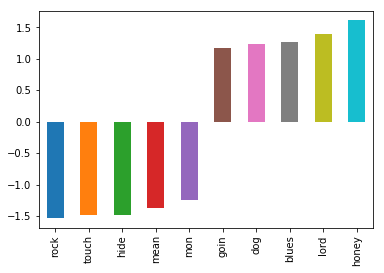

In [49]:
word.plot.bar()

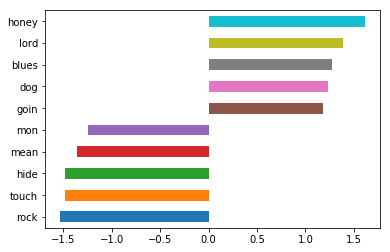

In [50]:
word.plot.barh()

In [59]:
word.plot.colormap()

AttributeError: 'SeriesPlotMethods' object has no attribute 'colormap'